In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('thresholding_dataset230724.csv')

In [3]:
##fliter out after crushing
filtered_data = df[~df['name_'].isin([ 'cam1_090424',
                                        'cam2_230524', 'cam2_240524',
                                        'cam_1_230624', 'cam_1_240624'])]

In [4]:
def sum_pc_every_n_rows(group,num_row):
    return group.groupby(group.index // num_row)['PC'].sum().reset_index(drop=True)

In [5]:
df10min = filtered_data.groupby(['class','event','name_'],dropna = False).apply(sum_pc_every_n_rows,2).reset_index()
df10min.drop(columns = ['level_3'], inplace = True)

In [6]:
def describe_pc_every_n_rows(group,num_row):
    return group.groupby(group.index // num_row)['PC'].describe().reset_index(drop=True)

In [7]:
df60min_summary = df10min.groupby(['class','event','name_'],dropna = False).apply(describe_pc_every_n_rows,6).reset_index()

In [8]:
print('describe statistic every 1 hour usig 10 min PC dataset')
##use only 6 menbers(1 hr.) summary
df60min_summary = df60min_summary[(df60min_summary['count'] == 6)]
df60min_summary

describe statistic every 1 hour usig 10 min PC dataset


,class,event,name_,level_3,count,mean,std,min,25%,50%,75%,max
0,crush,0.0,cam1_060424,0,6.0,7.833333,5.344779,0.0,4.75,8.0,12.00,14.0
1,crush,0.0,cam1_060424,1,6.0,12.166667,6.735478,7.0,7.25,9.5,14.75,24.0
2,crush,0.0,cam1_060424,2,6.0,18.500000,7.609205,9.0,12.00,20.0,24.25,27.0
3,crush,0.0,cam1_060424,3,6.0,4.000000,2.097618,2.0,3.00,3.5,4.00,8.0
4,crush,0.0,cam1_060424,4,6.0,8.500000,5.683309,0.0,6.25,8.5,10.75,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,normal,NaN,3110,10,6.0,4.000000,3.847077,0.0,2.00,3.0,4.75,11.0
282,normal,NaN,3110,11,6.0,6.166667,4.355074,0.0,4.25,6.0,7.75,13.0
283,normal,NaN,3110,12,6.0,8.500000,5.167204,2.0,5.75,8.0,10.25,17.0
284,normal,NaN,3110,13,6.0,13.666667,11.944315,0.0,5.00,15.0,16.75,33.0


In [9]:
####package install for id3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
#Dataset for tree
df_tree = df60min_summary.drop(columns = ['event', 'name_', 'level_3', 'count'])
#Building tree


(0.0, 1.0, 0.0, 1.0)

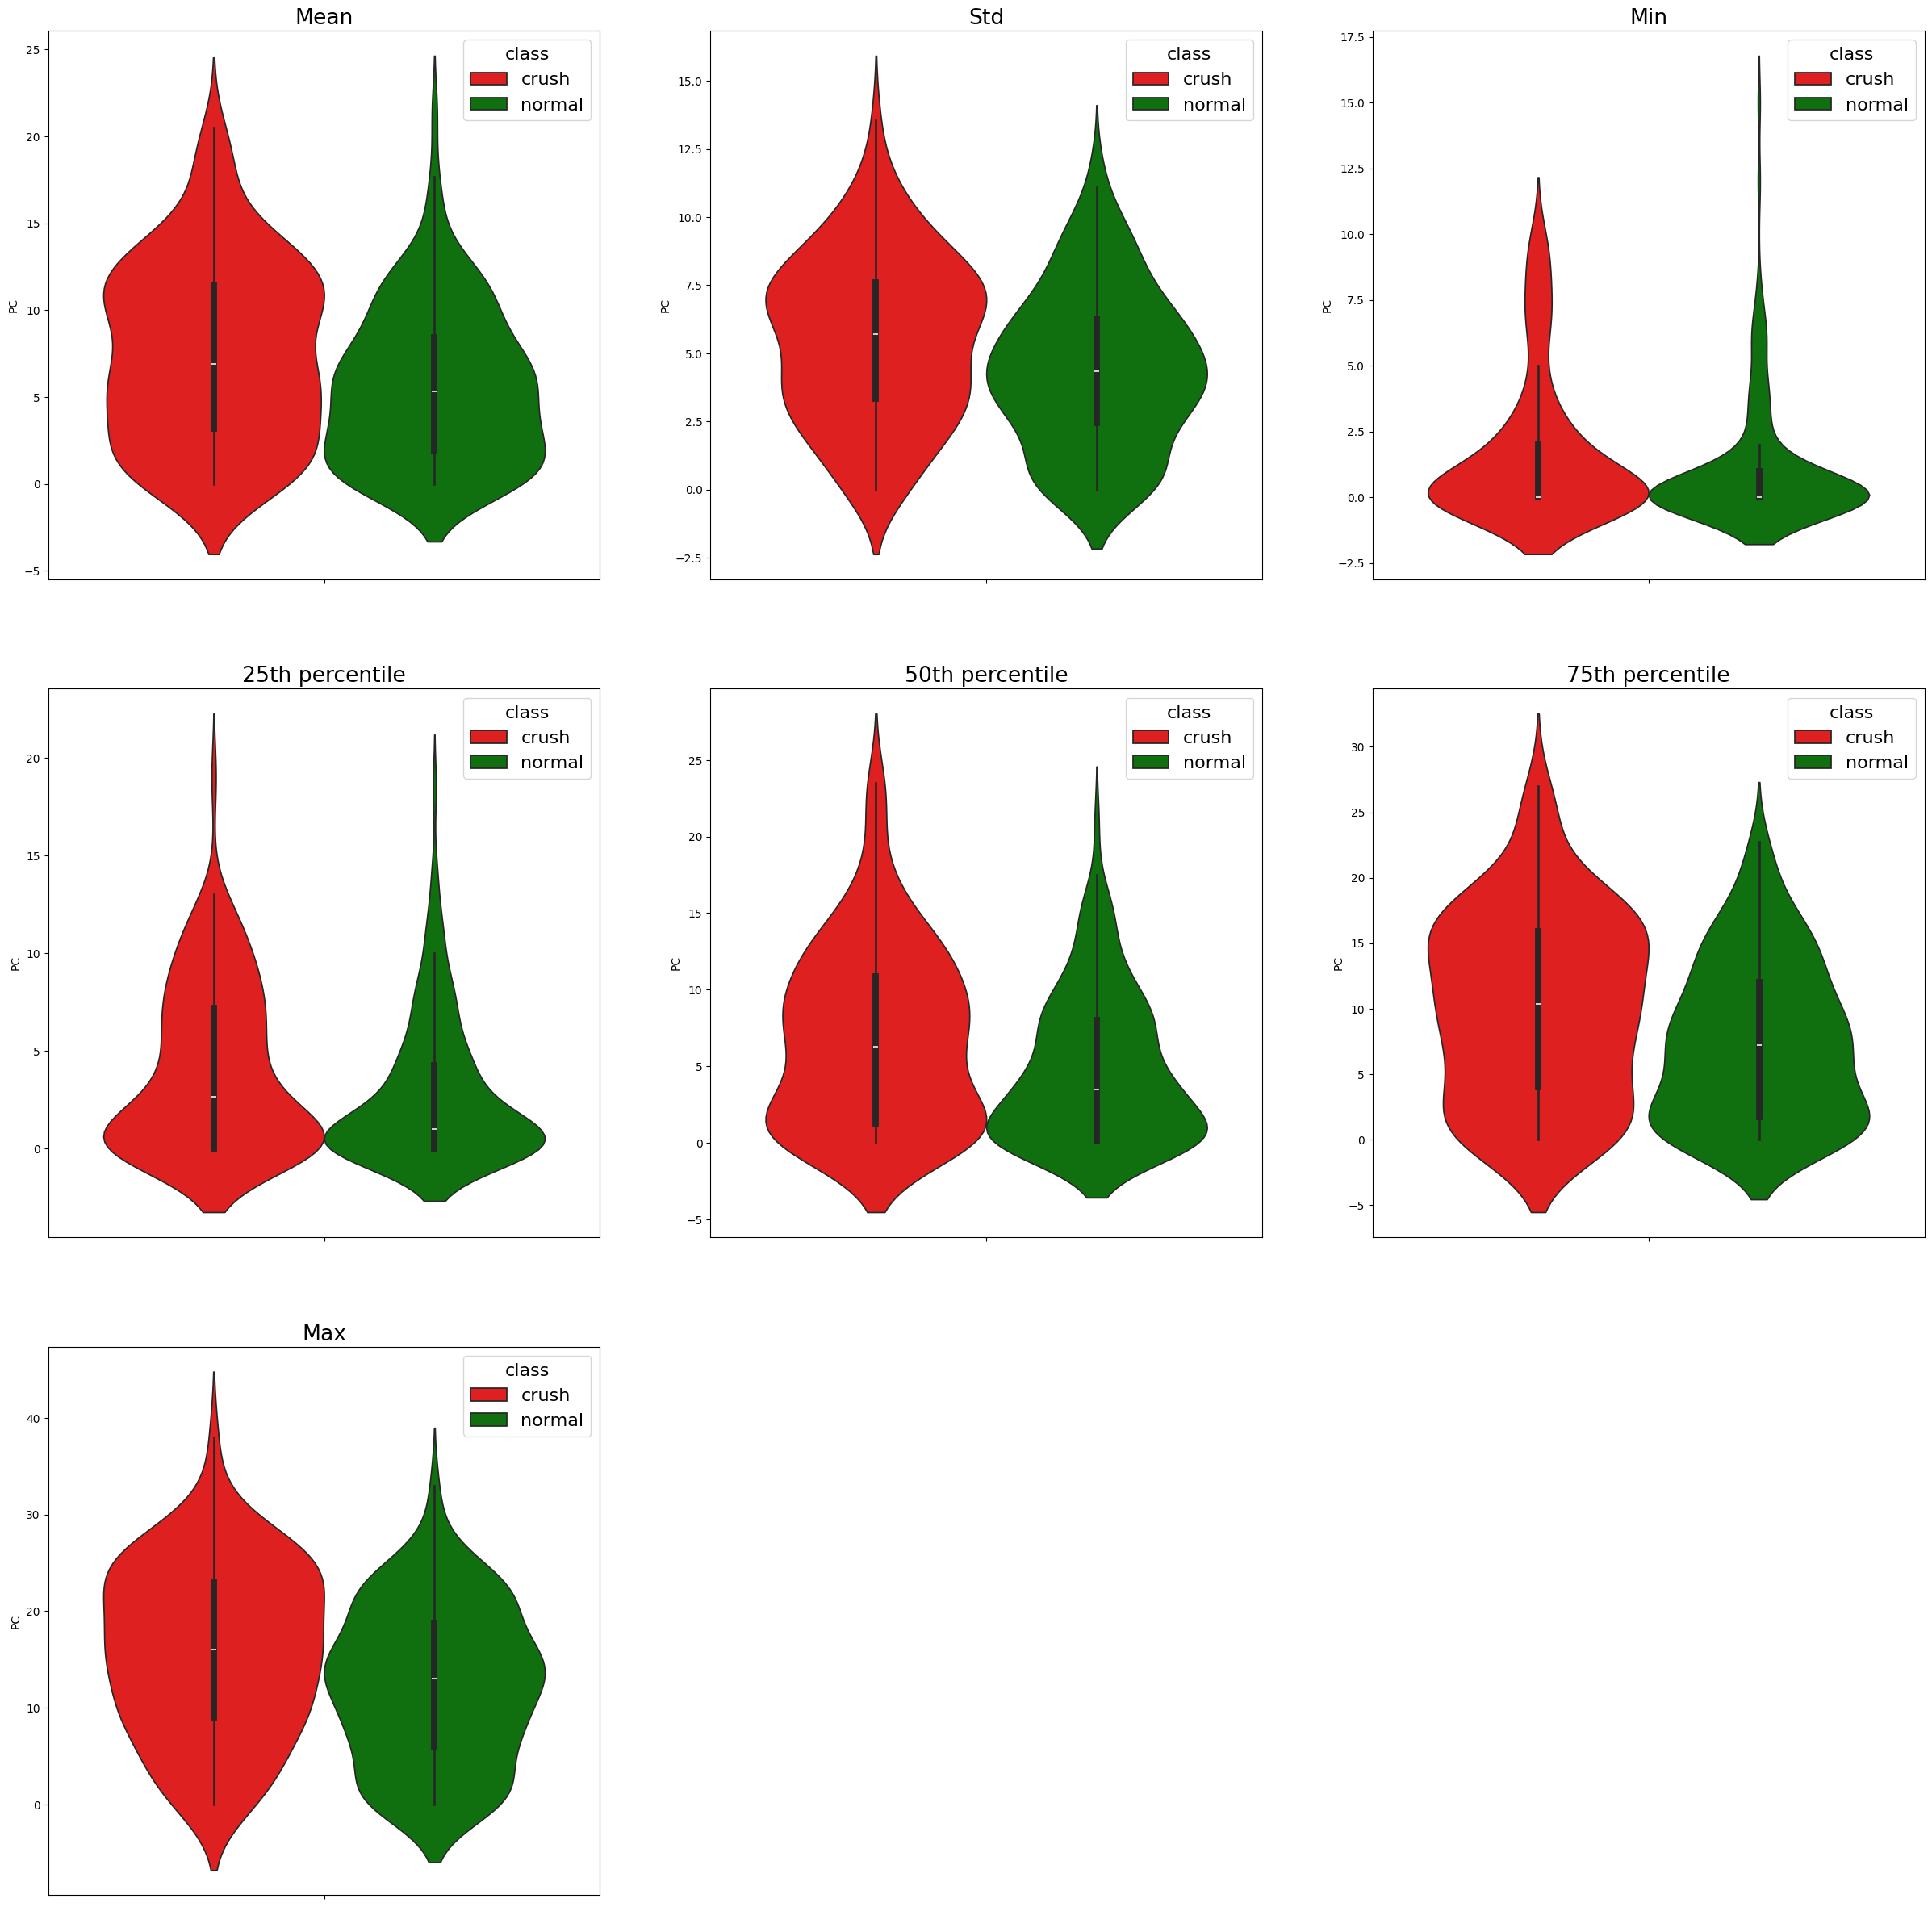

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
plt.rcParams.update({'font.size': 16})
ax1 = sn.violinplot(ax = axs[0,0], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = 'mean', palette = ['r','g'])
sn.move_legend(ax1, "best")
ax1.set_title("Mean")
ax1.set_ylabel("PC")

ax2 = sn.violinplot(ax = axs[0,1], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = 'std', palette = ['r','g'])
sn.move_legend(ax1, "best")
ax2.set_title("Std")
ax2.set_ylabel("PC")

ax3 = sn.violinplot(ax = axs[0,2], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = 'min', palette = ['r','g'])
sn.move_legend(ax1, "best")
ax3.set_title("Min")
ax3.set_ylabel("PC")

ax4 = sn.violinplot(ax = axs[1,0], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = '25%', palette = ['r','g'])
sn.move_legend(ax1, "best")
ax4.set_title("25th percentile")
ax4.set_ylabel("PC")

ax5 = sn.violinplot(ax = axs[1,1], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = '50%', palette = ['r','g'])
sn.move_legend(ax1, "best")
ax5.set_title("50th percentile")
ax5.set_ylabel("PC")

ax6 = sn.violinplot(ax = axs[1,2], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = '75%', palette = ['r','g'])
sn.move_legend(ax1, "best")
ax6.set_title("75th percentile")
ax6.set_ylabel("PC")

ax7 = sn.violinplot(ax = axs[2,0], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = 'max', palette = ['r','g'])
sn.move_legend(ax1, "best")
ax7.set_title("Max")
ax7.set_ylabel("PC")

axs[2,1].axis('off')
axs[2, 2].axis('off')

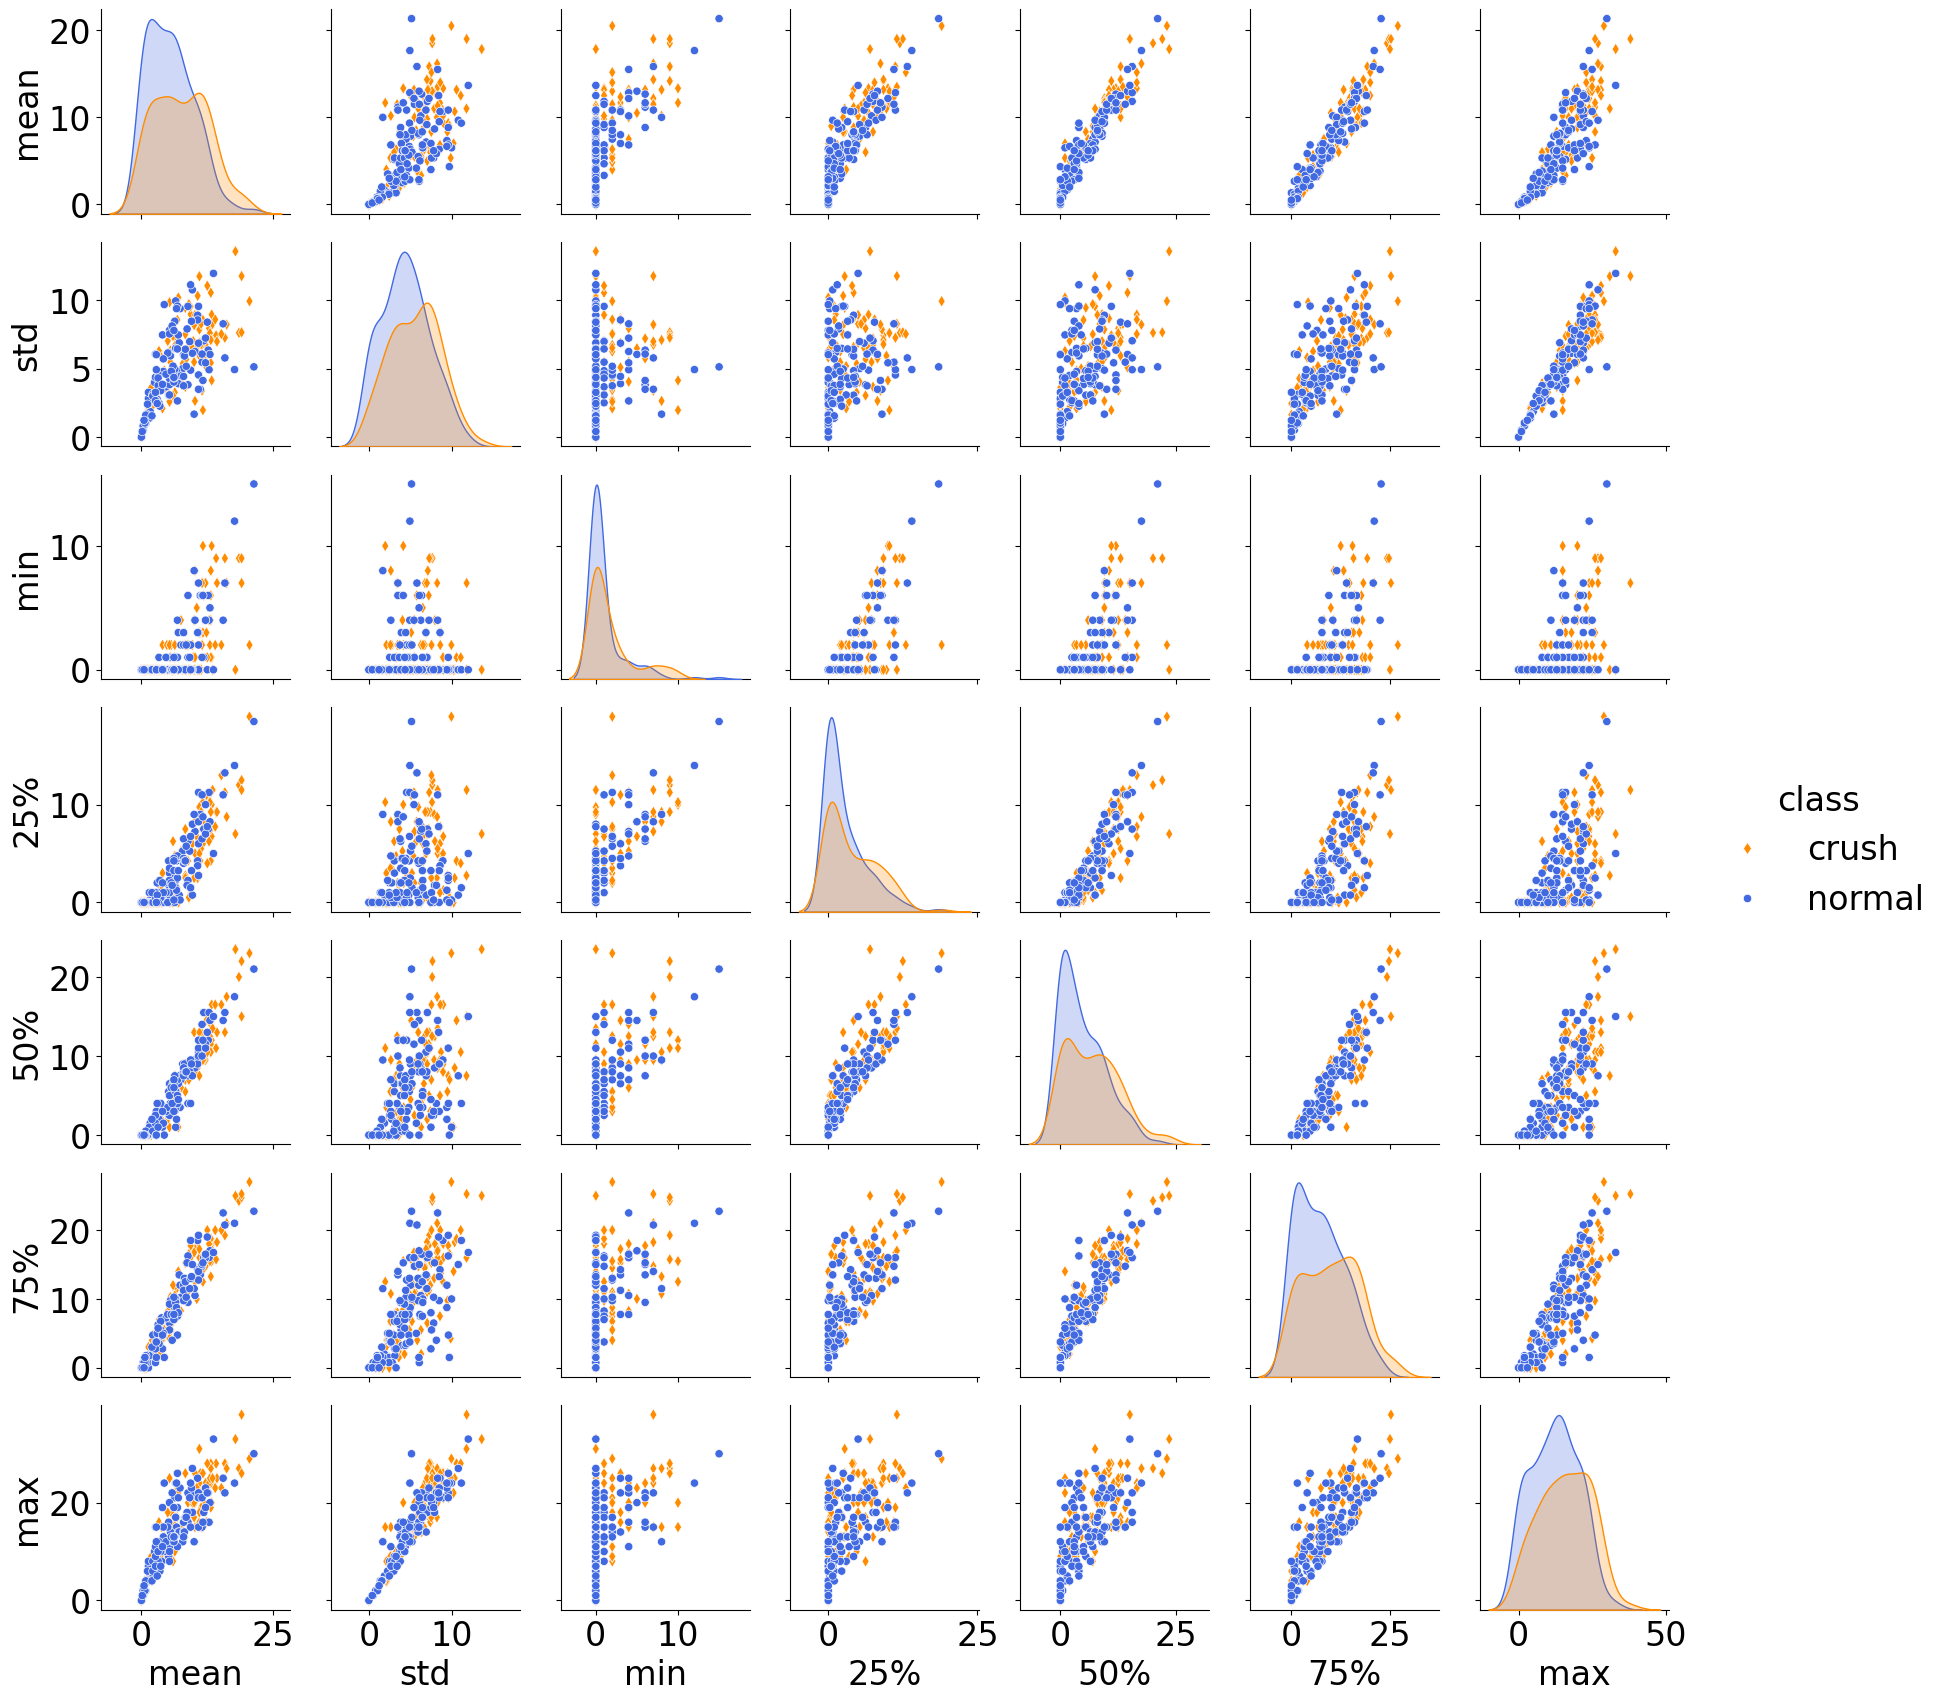

In [17]:
plt.rcParams.update({'font.size': 24})
sn.pairplot(df_tree[['mean','std','min','25%','50%','75%','max','class']], hue = 'class', palette = ['darkorange','royalblue'], markers=["d", "o"]).savefig("pairplot.png")

In [45]:
X = df_tree[['mean','std','min','25%','50%','75%','max']]
y = df_tree['class']

In [46]:
le = LabelEncoder()
le.fit(y)

print('label members: ',le.classes_)
print('transform "crush" to', le.transform(['crush', 'normal'])[0],end = '\n')
print('transform "normal" to', le.transform(['crush', 'normal'])[1])

y = le.transform(y)

label members:  ['crush' 'normal']
transform "crush" to 0
transform "normal" to 1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,make_scorer

In [16]:
parameters = {'max_depth':[3,5,7,9,11,None], 'criterion':['gini','entropy','log_loss'], 'min_samples_split':[0.05,0.1,0.2] }
scoring = {'accuracy' : make_scorer(accuracy_score), 'f1' : make_scorer(f1_score,pos_label=0), 'precision' : make_scorer(precision_score,pos_label=0), 'Sensitivity': make_scorer(recall_score,pos_label=0),'Specificity': make_scorer(recall_score,pos_label=1)}
model = tree.DecisionTreeClassifier(random_state = 42)
clf = GridSearchCV(model, parameters,
                   scoring = scoring,
                   refit = 'Sensitivity',
                   cv = 5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11, None],
                         'min_samples_split': [0.05, 0.1, 0.2]},
             refit='Sensitivity',
             scoring={'Sensitivity': make_scorer(recall_score, response_method='predict', pos_label=0),
                      'Specificity': make_scorer(recall_score, response_method='predict', pos_label=1),
                      'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', pos_label=0),
                      'precision': make_scorer(precision_score, response_method='predict', pos_label=0)})

In [17]:
for i,j,k,l,m,n in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_accuracy'],
                    clf.cv_results_['mean_test_f1'],
                    clf.cv_results_['mean_test_precision'],
                    clf.cv_results_['mean_test_Sensitivity'],
                    clf.cv_results_['mean_test_Specificity']):
    print(f'Parameter[{i}], accuracy = {"%.2f" %j}, f1 = {"%.2f" %k}, precision = {"%.2f" %l}, Sensitivity = {"%.2f" %m}, Specificity = {"%.2f" %n}')

Parameter[{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.05}], accuracy = 0.56, f1 = 0.44, precision = 0.60, Sensitivity = 0.37, Specificity = 0.74
Parameter[{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.1}], accuracy = 0.57, f1 = 0.44, precision = 0.61, Sensitivity = 0.37, Specificity = 0.75
Parameter[{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.2}], accuracy = 0.56, f1 = 0.45, precision = 0.56, Sensitivity = 0.39, Specificity = 0.71
Parameter[{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.05}], accuracy = 0.53, f1 = 0.47, precision = 0.54, Sensitivity = 0.46, Specificity = 0.60
Parameter[{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.1}], accuracy = 0.54, f1 = 0.47, precision = 0.54, Sensitivity = 0.44, Specificity = 0.62
Parameter[{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.2}], accuracy = 0.52, f1 = 0.45, precision = 0.51, Sensitivity = 0.44, Specificity = 0.59
Parameter[{'criterion': 'gini', 

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = None, criterion = 'entropy',min_samples_split = 0.2, random_state = 42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=0.2,
                       random_state=42)

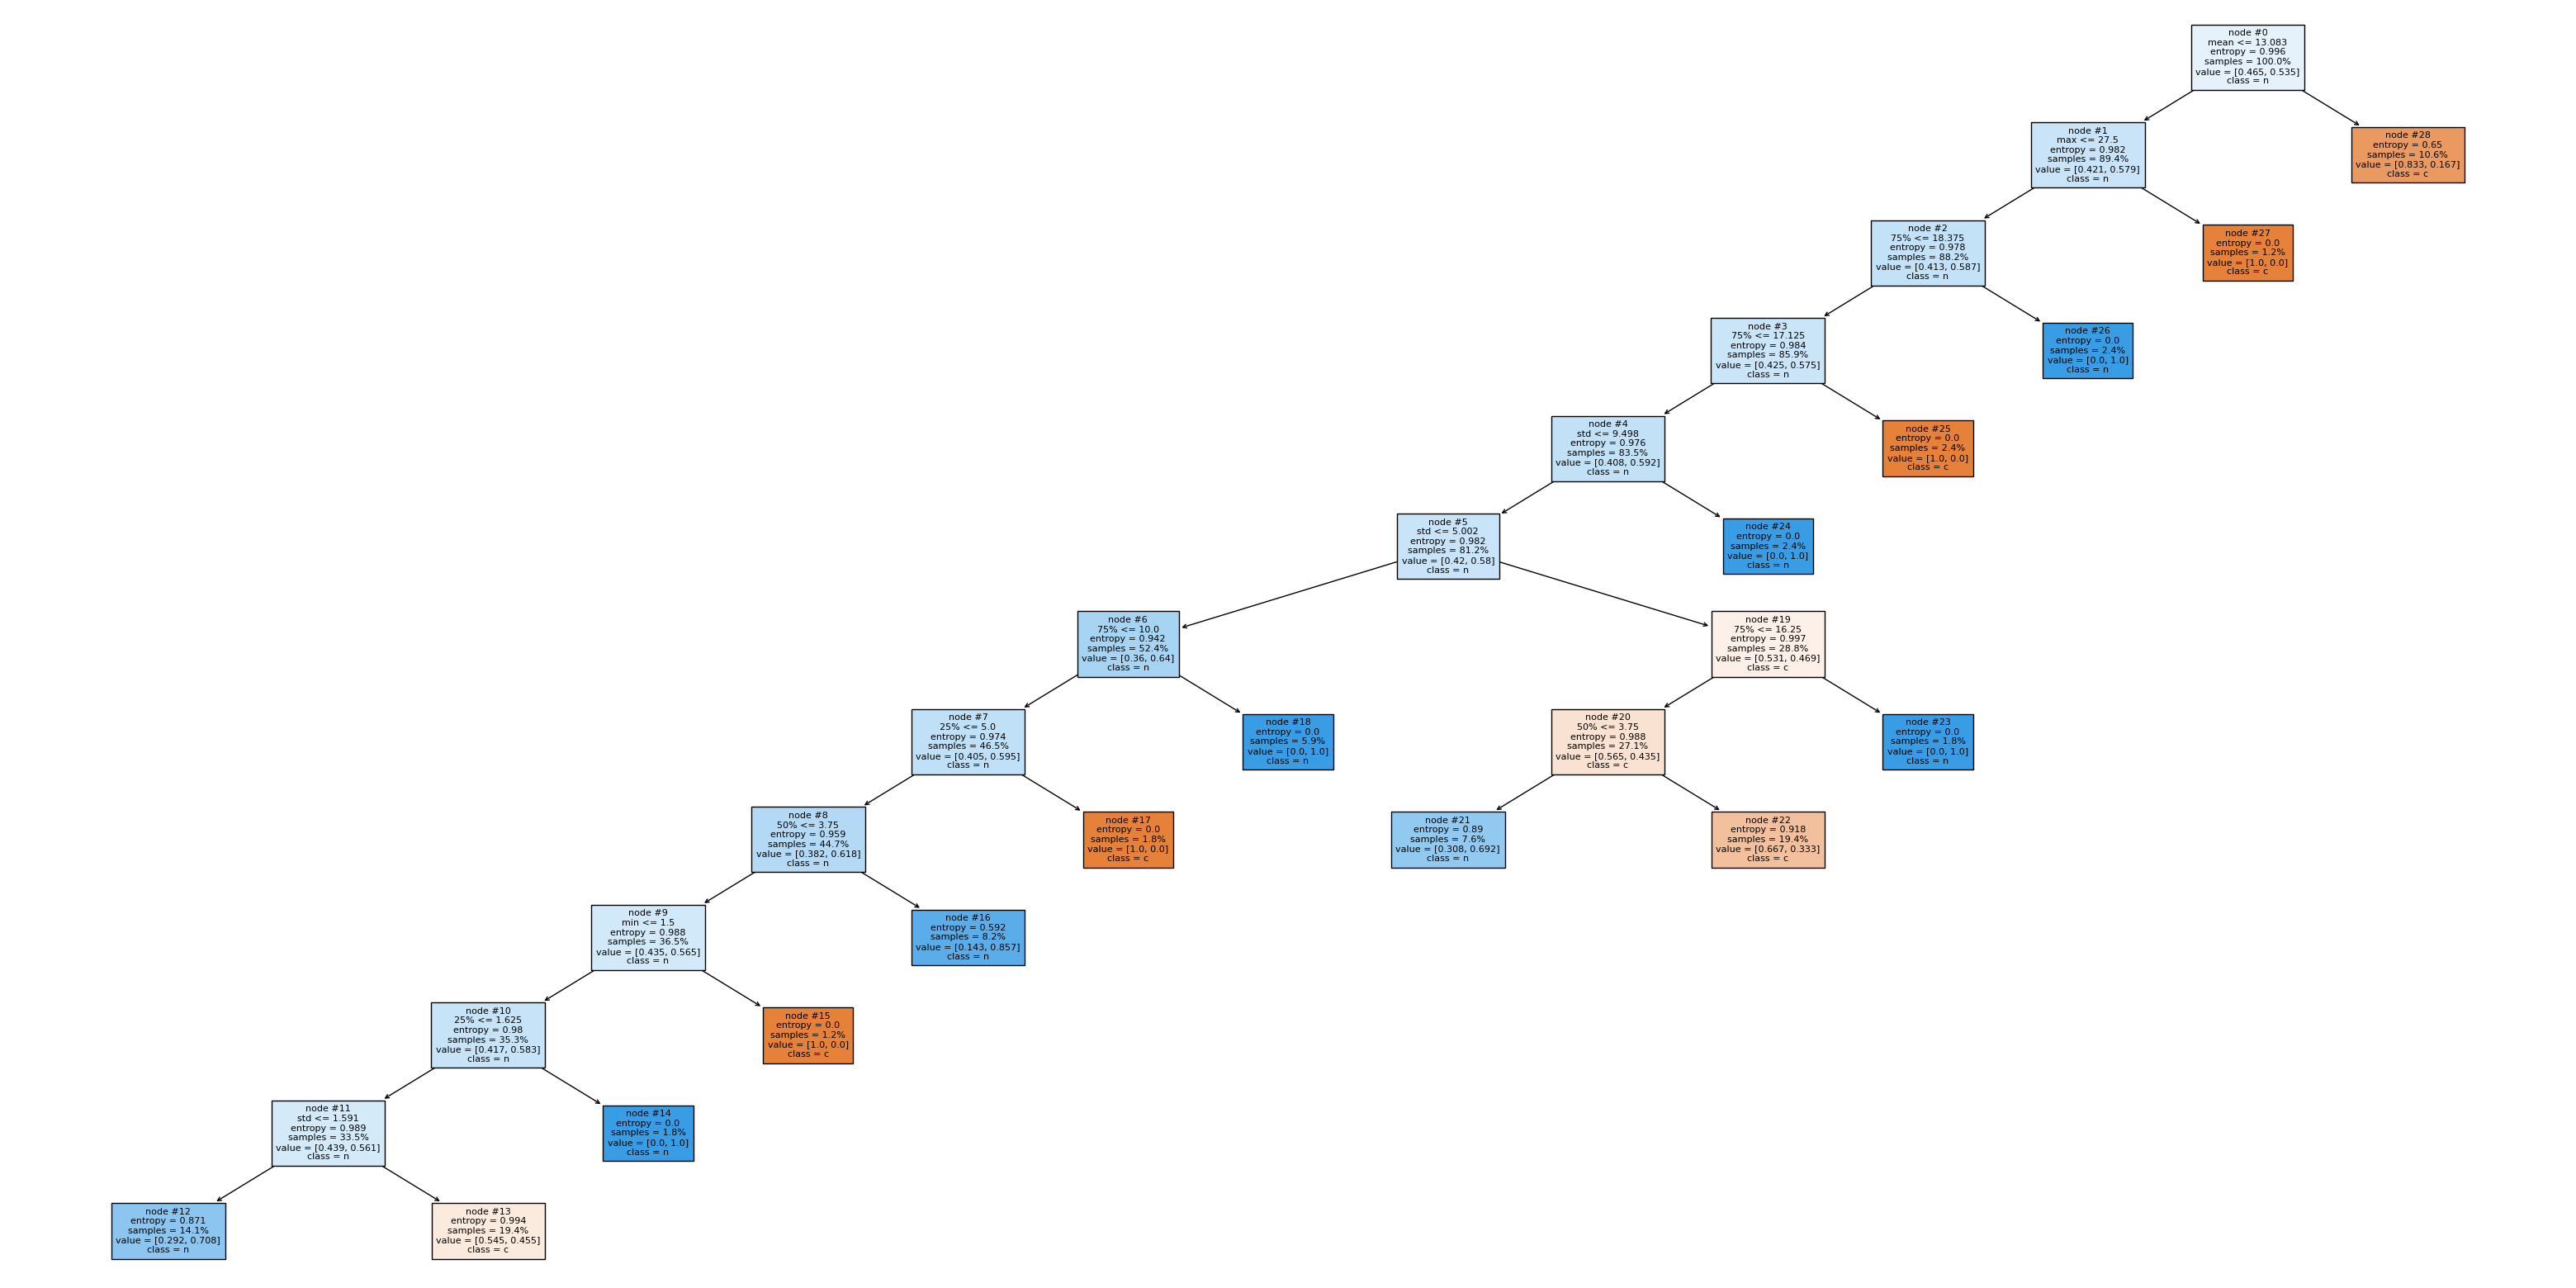

In [19]:
plt.figure(figsize = (40,20))
plt.rcParams.update({'font.size': 8})
tree.plot_tree(clf,feature_names = X.columns, fontsize = 8, filled = True, node_ids = True, proportion = True, class_names = ['c','n'])
plt.savefig('entropy_None_20_cbn.png')
plt.show()

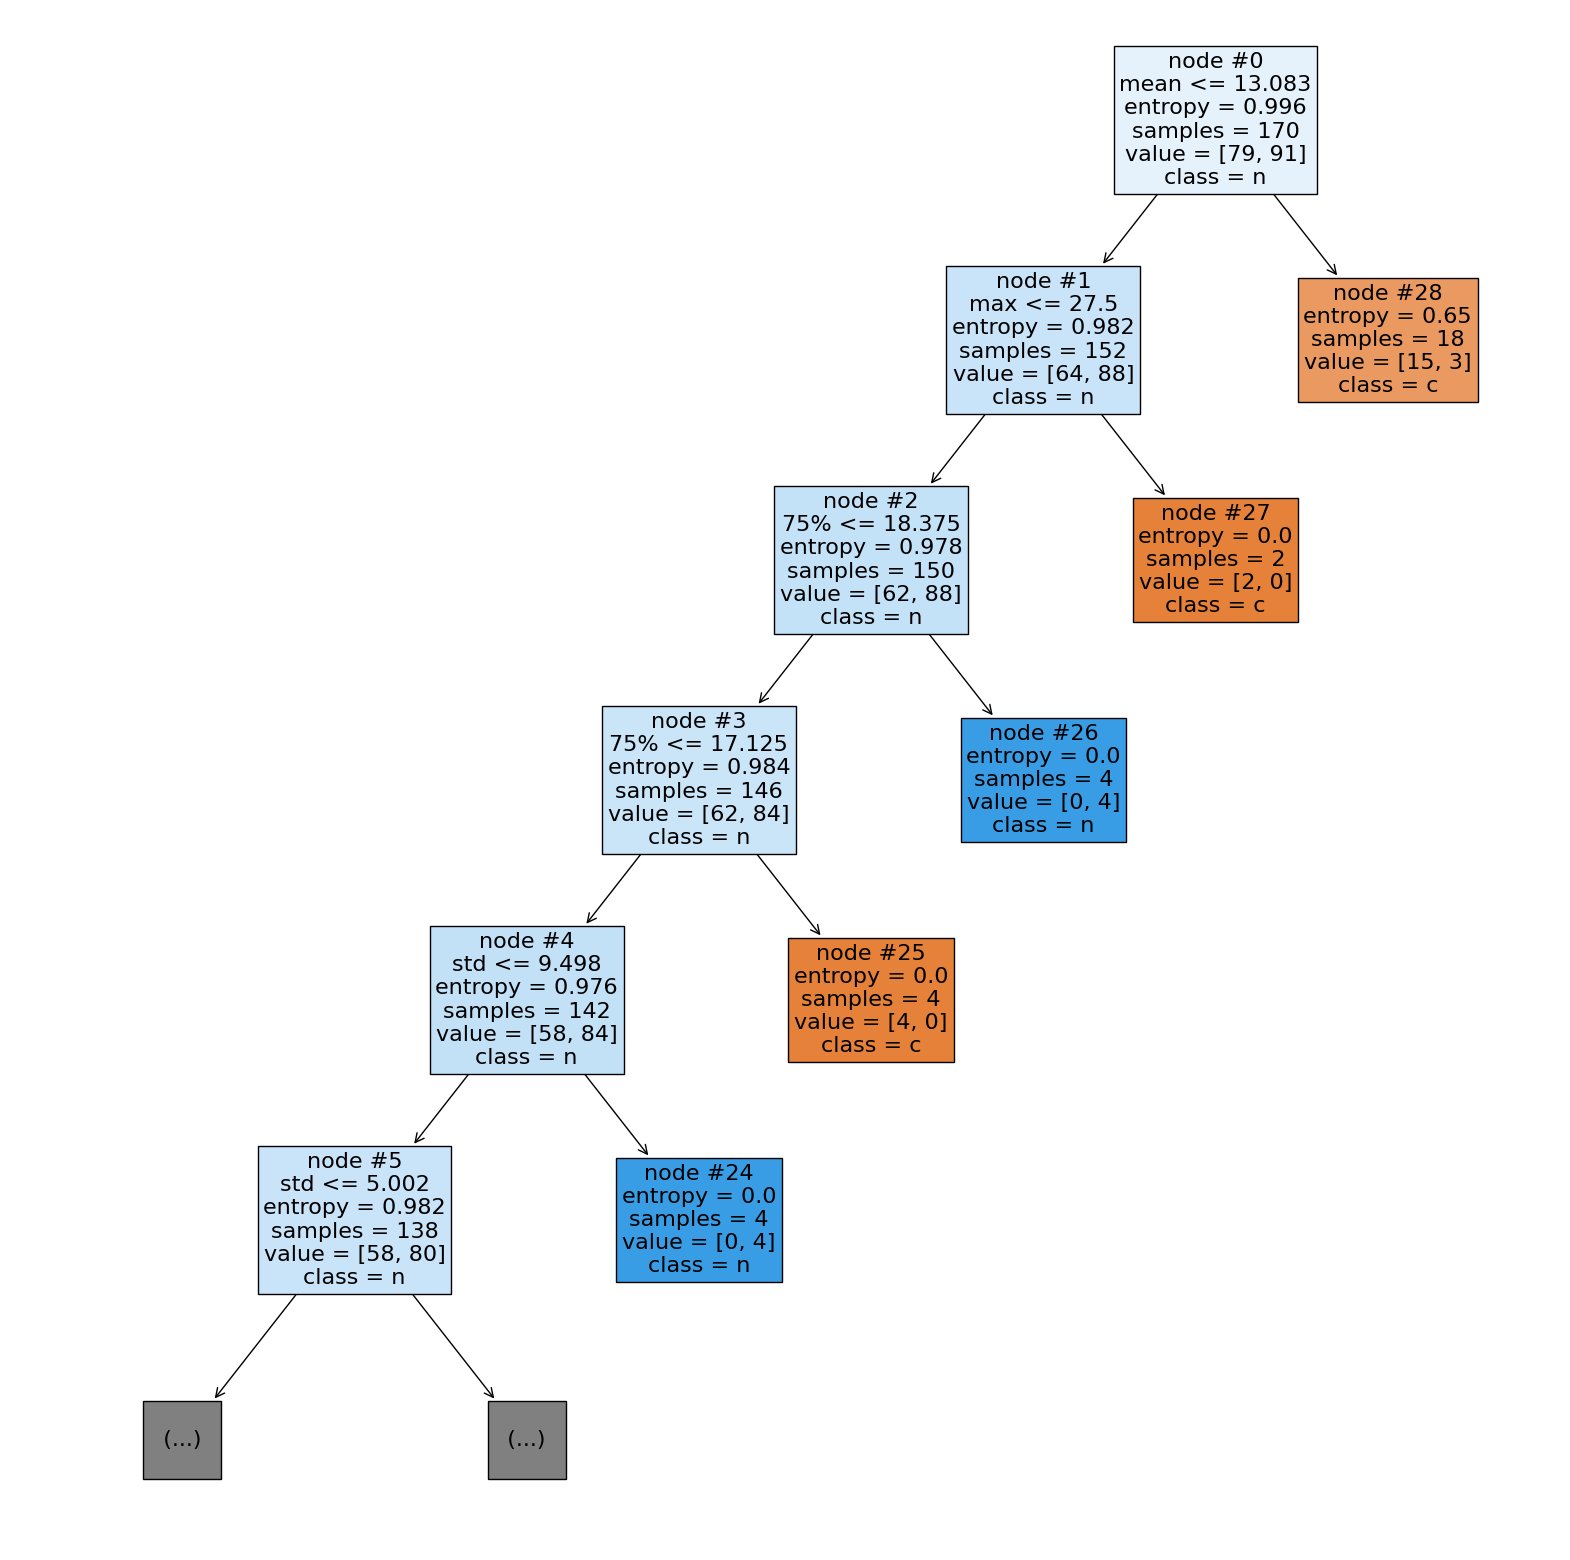

In [20]:
plt.figure(figsize = (20,20))
plt.rcParams.update({'font.size': 20})
tree.plot_tree(clf,
               feature_names = X.columns,
               max_depth = 5,
               fontsize = 16,
               filled = True,
               node_ids = True,
               proportion = False,
               class_names = ['c','n'])
plt.savefig('entropy_None_20_cbn_sh.png')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cfx = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cfx)

[[18 13]
 [24 19]]


In [22]:
se = cfx[0][0]/(cfx[0][0]+cfx[1][0])
sp = cfx[1][1]/(cfx[0][1]+cfx[1][1])
print('sensitivity:',se)
print('specificsity:',sp)

sensitivity: 0.42857142857142855
specificsity: 0.59375


In [23]:
#day?????

In [24]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [25]:
###gride search for SVC
parameters = {'C' : [1,0.1,0.01] , 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
scoring = {'accuracy' : make_scorer(accuracy_score), 'f1' : make_scorer(f1_score,pos_label=0), 'precision' : make_scorer(precision_score,pos_label=0,zero_division = 0), 'Sensitivity': make_scorer(recall_score,pos_label=0, zero_division = 0),'Specificity': make_scorer(recall_score,pos_label=1)}
model = SVC(random_state = 42)
clf = GridSearchCV(model, parameters,
                   scoring = scoring,
                   refit = 'Sensitivity',
                   cv = 5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='Sensitivity',
             scoring={'Sensitivity': make_scorer(recall_score, response_method='predict', pos_label=0, zero_division=0),
                      'Specificity': make_scorer(recall_score, response_method='predict', pos_label=1),
                      'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', pos_label=0),
                      'precision': make_scorer(precision_score, response_method='predict', pos_label=0, zero_division=0)})

In [26]:
for i,j,k,l,m,n in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_accuracy'],
                    clf.cv_results_['mean_test_f1'],
                    clf.cv_results_['mean_test_precision'],
                    clf.cv_results_['mean_test_Sensitivity'],
                    clf.cv_results_['mean_test_Specificity']):
    print(f'Parameter[{i}], accuracy = {"%.2f" %j}, f1 = {"%.2f" %k}, precision = {"%.2f" %l}, Sensitivity = {"%.2f" %m}, Specificity = {"%.2f" %n}')

Parameter[{'C': 1, 'kernel': 'linear'}], accuracy = 0.52, f1 = 0.33, precision = 0.50, Sensitivity = 0.26, Specificity = 0.76
Parameter[{'C': 1, 'kernel': 'poly'}], accuracy = 0.61, f1 = 0.37, precision = 0.70, Sensitivity = 0.25, Specificity = 0.91
Parameter[{'C': 1, 'kernel': 'rbf'}], accuracy = 0.59, f1 = 0.39, precision = 0.68, Sensitivity = 0.28, Specificity = 0.87
Parameter[{'C': 1, 'kernel': 'sigmoid'}], accuracy = 0.53, f1 = 0.49, precision = 0.49, Sensitivity = 0.51, Specificity = 0.55
Parameter[{'C': 0.1, 'kernel': 'linear'}], accuracy = 0.55, f1 = 0.31, precision = 0.57, Sensitivity = 0.23, Specificity = 0.84
Parameter[{'C': 0.1, 'kernel': 'poly'}], accuracy = 0.61, f1 = 0.39, precision = 0.74, Sensitivity = 0.27, Specificity = 0.91
Parameter[{'C': 0.1, 'kernel': 'rbf'}], accuracy = 0.54, f1 = 0.00, precision = 0.00, Sensitivity = 0.00, Specificity = 1.00
Parameter[{'C': 0.1, 'kernel': 'sigmoid'}], accuracy = 0.54, f1 = 0.00, precision = 0.00, Sensitivity = 0.00, Specificity

In [49]:
clf = SVC(C = 1, kernel = 'sigmoid', random_state = 42)


In [50]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cfx = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cfx)

[[17 14]
 [15 28]]


In [51]:
se = cfx[0][0]/(cfx[0][0]+cfx[1][0])
sp = cfx[1][1]/(cfx[0][1]+cfx[1][1])
print('sensitivity:',se)
print('specificity:',sp)

sensitivity: 0.53125
specificity: 0.6666666666666666


In [ ]:
Display

In [28]:
clf = MLPClassifier(random_state=1, max_iter=5000)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.49 accuracy with a standard deviation of 0.09


In [29]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cfx = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cfx)

[[15 16]
 [14 29]]


In [30]:
se = cfx[0][0]/(cfx[0][0]+cfx[1][0])
sp = cfx[1][1]/(cfx[0][1]+cfx[1][1])
print('sensitivity:',se)
print('specificity:',sp)

sensitivity: 0.5172413793103449
specificity: 0.6444444444444445


In [52]:
##day basis
y_pred = clf.predict(X)
df60min_summary['pred'] = y_pred
df60min_summary

,class,event,name_,level_3,count,mean,std,min,25%,50%,75%,max,pred
0,crush,0.0,cam1_060424,0,6.0,7.833333,5.344779,0.0,4.75,8.0,12.00,14.0,1
1,crush,0.0,cam1_060424,1,6.0,12.166667,6.735478,7.0,7.25,9.5,14.75,24.0,0
2,crush,0.0,cam1_060424,2,6.0,18.500000,7.609205,9.0,12.00,20.0,24.25,27.0,0
3,crush,0.0,cam1_060424,3,6.0,4.000000,2.097618,2.0,3.00,3.5,4.00,8.0,1
4,crush,0.0,cam1_060424,4,6.0,8.500000,5.683309,0.0,6.25,8.5,10.75,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,normal,NaN,3110,10,6.0,4.000000,3.847077,0.0,2.00,3.0,4.75,11.0,1
282,normal,NaN,3110,11,6.0,6.166667,4.355074,0.0,4.25,6.0,7.75,13.0,1
283,normal,NaN,3110,12,6.0,8.500000,5.167204,2.0,5.75,8.0,10.25,17.0,1
284,normal,NaN,3110,13,6.0,13.666667,11.944315,0.0,5.00,15.0,16.75,33.0,0


In [53]:
a = df60min_summary.groupby(['class','name_']).count()

In [54]:
b = df60min_summary.groupby(['class','name_']).sum()

In [55]:
a.drop(columns = ['event', 'level_3', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'] , inplace = True)
b.drop(columns = ['event', 'level_3', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'] , inplace = True)

In [56]:
b['total'] = a['pred']

In [57]:
b['Pos_%'] = (b['total']-b['pred'])/ b['total']

In [58]:
b

pred  total     Pos_%
class  name_                              
crush  cam1_050624      3      7  0.571429
       cam1_060424      6     10  0.400000
       cam1_060624      6      7  0.142857
       cam1_070424      7     10  0.300000
       cam1_070624      3      7  0.571429
       cam1_080424      4     10  0.600000
       cam1_080624      5      7  0.285714
       cam1_090624      3      7  0.571429
       cam1_100624      3      7  0.571429
       cam2_190524      1      4  0.750000
       cam2_200524      1      7  0.857143
       cam2_210524      2      6  0.666667
       cam2_220524      2      7  0.714286
       cam_1_210624     4      7  0.428571
       cam_1_220624     4      7  0.428571
normal 020324           3      7  0.571429
       030324           4      7  0.428571
       040324           4      7  0.428571
       050324           4      7  0.428571
       131123           9     13  0.307692
       131123_2         9     15  0.400000
       1410             7      7  0.000000
       1910             6      9  0.333333
       201123           9     15  0.400000
       201123_2        13     17  0.235294
       2409             6      9  0.333333
       270324           2      7  0.714286
       3110             8     14  0.428571